This notebook is part of the `kikuchipy` documentation https://kikuchipy.org.
Links to the documentation won't work from the notebook.

# Load and save data

## Load patterns

### From a file

kikuchipy can read and write experimental EBSD patterns and EBSD master patterns
from/to multiple formats (see [supported formats](#supported-formats). To load
patterns from file use the [load()](reference.rst#kikuchipy.io._io.load)
function. Let's import the necessary libraries and read the Nickel EBSD test
data set directly from file (not via
[kikuchipy.data.nickel_small](reference.rst#kikuchipy.data.nickel_ebsd)):

In [12]:
# exchange inline for qt5 for interactive plotting from the pyqt package
%matplotlib inline

import dask.array as da
import hyperspy.api as hs
import kikuchipy as kp
import numpy as npb


datadir = "../kikuchipy/data/"
kikuchipy_ebsd = "kikuchipy/patterns.h5"
s = kp.load(datadir + kikuchipy_ebsd)
s

<EBSD, title: patterns My awes0m4 ..., dimensions: (3, 3|60, 60)>

Or, load the square Lambert projection of the northern hemisphere of an EBSD master pattern for a 20 keV beam energy from EMsoft's master pattern file, returned from their `EMEBSDmaster.f90` program:

In [11]:
#s_mp = kp.load("master_patterns.h5")
#s_mp

All file readers support accessing the data without loading it into memory (with the [Dask library](https://docs.dask.org/en/latest)), which can be useful when processing large data sets to avoid memory errors:

In [13]:
s = kp.load(datadir + kikuchipy_ebsd, lazy=True)
s

<LazyEBSD, title: patterns My awes0m4 ..., dimensions: (3, 3|60, 60)>

When lazily loaded EBSD patterns are processed, they are processed chunk by
chunk, which in many cases leads to longer processing times, so processing lazy
data sets should be done with some care. See the relevant
[HyperSpy user guide](http://hyperspy.org/hyperspy-doc/current/user_guide/big_data.html)
for information on how to do this.

Visualization of the data is done by navigating the navigation space and looking at the signal in each navigation point:

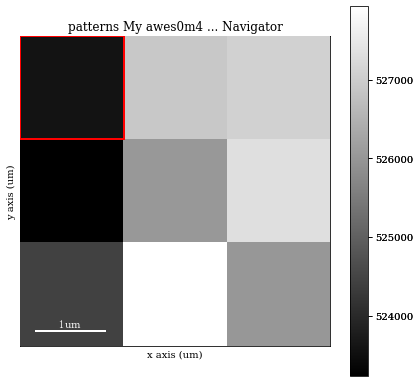

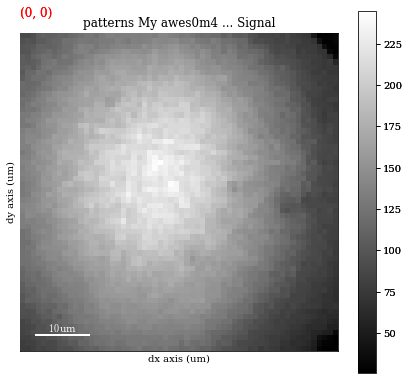

In [15]:
s.plot()

Upon loading, kikuchipy tries to read all scan information from the file and
stores everything it can read in the `original_metadata` attribute:

In [16]:
s.original_metadata

Also, some information may be stored in a standard location in the `metadata`
attribute where it can be used by EBSD class methods:

In [17]:
s.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EBSD
│       │       ├── azimuth_angle = 0.0
│       │       ├── binning = 8
│       │       ├── detector = NORDIF UF1100
│       │       ├── elevation_angle = 0.0
│       │       ├── exposure_time = 0.0035
│       │       ├── frame_number = 1
│       │       ├── frame_rate = 202
│       │       ├── gain = 0.0
│       │       ├── grid_type = square
│       │       ├── manufacturer = kikuchipy
│       │       ├── sample_tilt = 70.0
│       │       ├── scan_time = 148
│       │       ├── static_background = array([[84, 87, 90, ..., 27, 29, 30],
       [87, 90, 93, ..., 27, 28, 30],
   ...  80, 82, ..., 28, 26, 26],
       [76, 78, 80, ..., 26, 26, 25]], dtype=uint8)
│       │       ├── version = 0.1
│       │       ├── xpc = -5.64
│       │       ├── ypc = 17.28
│       │       └── zpc = 2087
│       ├── beam_energy = 20.0
│       ├── magnification = 200
│       ├── microscope = Hitachi SU-6600
│       └── working_distance = 24.7
├── General
│   └── title = patterns My awes0m4 ...
├── Sample
│   └── Phases
│       └── 1
│           ├── atom_coordinates
│           │   └── 1
│           │       ├── atom = Ni
│           │       ├── coordinates = array([0, 0, 0])
│           │       ├── debye_waller_factor = 0.0035
│           │       └── site_occupation = 1
│           ├── formula = Ni
│           ├── info = 
│           ├── lattice_constants = array([ 0.35236,  0.35236,  0.35236, 90.     , 90.     , 90.     ])
│           ├── laue_group = 
│           ├── material_name = Ni
│           ├── point_group = 
│           ├── setting = 0
│           ├── space_group = 225
│           └── symmetry = 0
└── Signal
    ├── binned = False
    └── signal_type = EBSD

The number of patterns in horizontal and vertical direction, pattern size in
pixels, scan step size and detector pixel size is stored in the `axes_manager`
attribute:

In [18]:
s.axes_manager

<Axes manager, axes: (3, 3|60, 60)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               x |      3 |      0 |       0 |     1.5 |     um 
               y |      3 |      0 |       0 |     1.5 |     um 
---------------- | ------ | ------ | ------- | ------- | ------ 
              dx |     60 |        |       0 |       1 |     um 
              dy |     60 |        |       0 |       1 |     um